In [1]:
import numpy as np
import pandas as pd
import pickle
from pprint import pprint

# Gensim
import gensim
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

# Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /home/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [4]:
def read_data():
    western_df = pd.read_pickle('western_df_english_cleaned_final.pkl')
    non_western_df = pd.read_pickle('non_western_df_english_cleaned_final.pkl')
    western_df['type'] = 'western'
    non_western_df['type'] = 'non western'
    return pd.concat([western_df, non_western_df]).reset_index(drop=True)

In [5]:
data = read_data()

In [6]:
data.shape

(3703201, 20)

In [7]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,first_review,last_review,review_scores_rating,probability,language,comments_cleaned,comments_cleaned_sentiment,num_words,year,type
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...,54730,2009-11-16,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,0.999997,en,My girlfriend and I hadn t known Alina before ...,My girlfriend and I hadn t known Alina before ...,153,2010,western
1,13913,2011-07-11,Alina was a really good host. The flat is clea...,54730,2009-11-16,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,0.999997,en,Alina was a really good host The flat is clean...,Alina was a really good host. The flat is clea...,31,2011,western
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...,54730,2009-11-16,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,0.999995,en,Alina is an amazing host She made me feel righ...,Alina is an amazing host. She made me feel rig...,70,2011,western
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ...",54730,2009-11-16,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,0.999997,en,Alina s place is so nice the room is big and c...,Alina s place is so nice the room is big and c...,87,2011,western
4,13913,2011-10-09,"Nice location in Islington area, good for shor...",54730,2009-11-16,Islington,London,51.56802,-0.11121,21,2010-08-18,2020-02-22,97.0,0.999998,en,Nice location in Islington area good for short...,Nice location in Islington area good for short...,17,2011,western


In [8]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
data['comment_to_sentences'] = data.comments_cleaned_sentiment.progress_map(sent_tokenize)

In [9]:
import re
data['comment_to_sentences_regex'] = data.comments_cleaned_sentiment.apply(lambda text: re.split(r' *[\.\?!][\'"\)\]]* *', text))

In [10]:
print(data['comment_to_sentences'].head().tolist()[:5])

[['My girlfriend and I hadn t known Alina before we took the leap of faith to rent her flat.', 'Alina just couldn t be nicer Her flat is comfortable homey very sunny and quiet at night.', 'Her diverse neighborhood rocks It s full of excellent eateries of varying ethnicities good supermarkets etc.', 'etc.', 'Her place is about a minute walk to the Finsbury Park tube stop and there are also several buses that ply Stroud Green Road.', 'The Piccadilly and Victoria tube lines that serve Finsbury Park are very dependable and come frequently.', 'My only caveat is if you are unwilling to take to minute commutes to downtown London attractions and money is no object you will prefer to stay downtown.', 'But for anyone else you will love your experience of living in a real untouristy neighborhood and dealing with a generous warm hearted woman I m happy to call a new friend.'], ['Alina was a really good host.', 'The flat is clean and tidy and really close to Finsbury Park station which is quite clo

In [11]:
print(data['comment_to_sentences_regex'].head().tolist()[:5])

[['My girlfriend and I hadn t known Alina before we took the leap of faith to rent her flat', 'Alina just couldn t be nicer Her flat is comfortable homey very sunny and quiet at night', 'Her diverse neighborhood rocks It s full of excellent eateries of varying ethnicities good supermarkets etc', 'etc', 'Her place is about a minute walk to the Finsbury Park tube stop and there are also several buses that ply Stroud Green Road', 'The Piccadilly and Victoria tube lines that serve Finsbury Park are very dependable and come frequently', 'My only caveat is if you are unwilling to take to minute commutes to downtown London attractions and money is no object you will prefer to stay downtown', 'But for anyone else you will love your experience of living in a real untouristy neighborhood and dealing with a generous warm hearted woman I m happy to call a new friend', ''], ['Alina was a really good host', 'The flat is clean and tidy and really close to Finsbury Park station which is quite close to

In [12]:
print('The average number of words in a document is: {}'.format(round(data.num_words.mean())))
print('The minimum number of words in a document is: {}'.format(min(data.num_words)))
print('The maximum number of words in a document is: {}'.format(max(data.num_words)))

The average number of words in a document is: 49
The minimum number of words in a document is: 7
The maximum number of words in a document is: 263


In [154]:
bins = [0, 7, 50, 263]
labels = ['short', 'medium', 'long']
data['num_words_bined'] = pd.cut(data['num_words'], bins=bins, labels=labels)

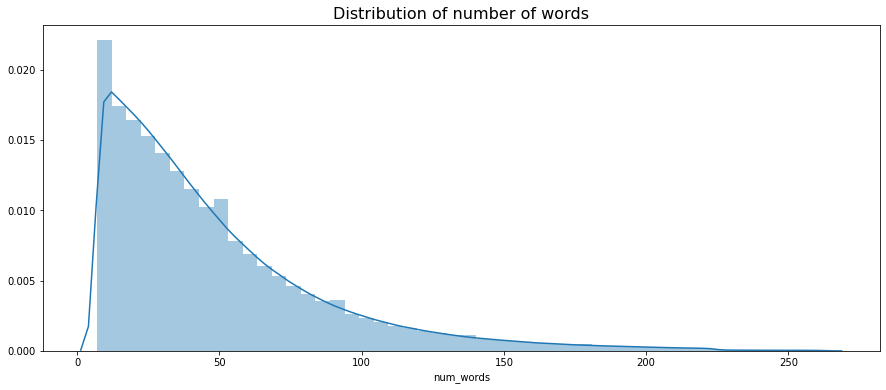

In [13]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title('Distribution of number of words', fontsize=16)
ax.set_xlabel('Number of words')

sns.distplot(data.num_words, bins=50, ax=ax)
ax.text(500, 10000, "1%ile    : " + str(round(np.quantile(non_western_df_english.num_words, q=0.01))), fontdict=dict(size=14))
;

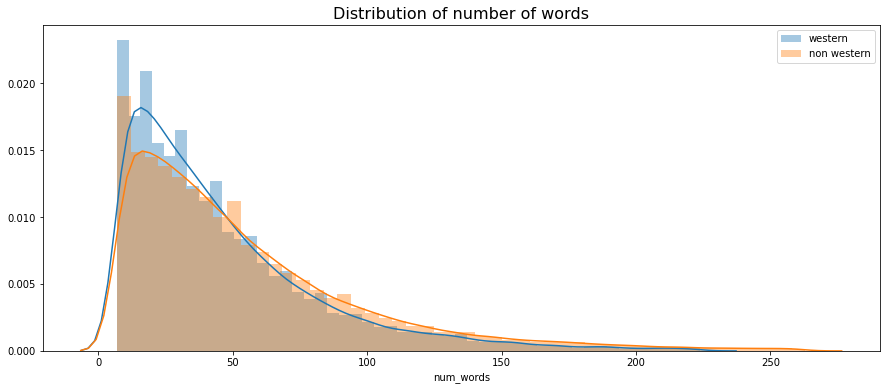

In [141]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title('Distribution of number of words', fontsize=16)
ax.set_xlabel('Number of words')
sns.distplot(data[data.type=='western'].num_words, bins=50, ax=ax, label='western')
sns.distplot(data[data.type=='non western'].num_words, bins=50, ax=ax, label='non western')

ax.legend();

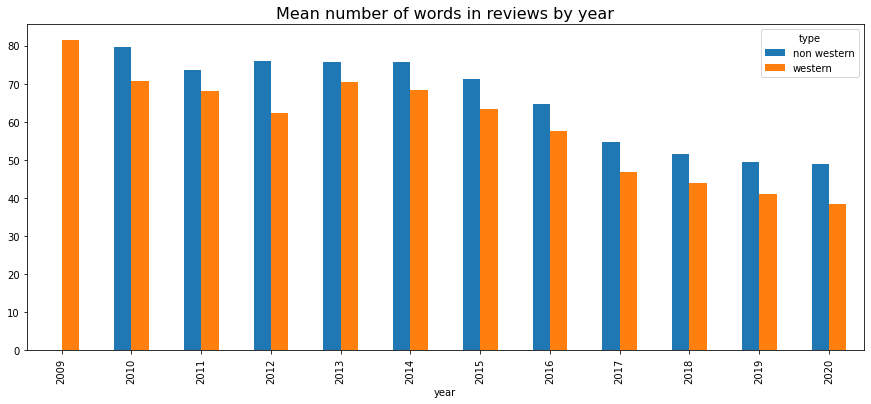

In [164]:
fig, ax = plt.subplots(figsize=(15,6))
data.groupby(['year', 'type'])['num_words'].mean().unstack().plot(kind='bar', ax=ax)
ax.set_title('Mean number of words in reviews by year', fontsize=16);

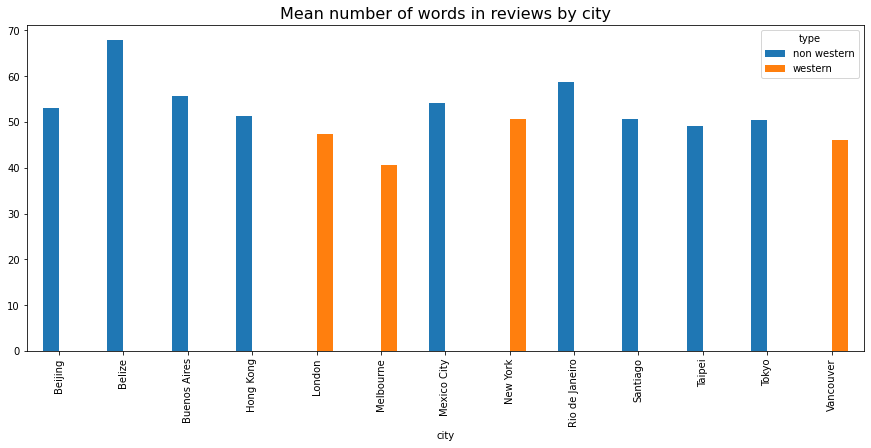

In [190]:
fig, ax = plt.subplots(figsize=(15,6))
mean_city = data.groupby(['city', 'type'])['num_words'].mean().reset_index().pivot('city', 'type', 'num_words').plot(kind='bar', ax=ax)
ax.set_title('Mean number of words in reviews by city', fontsize=16);

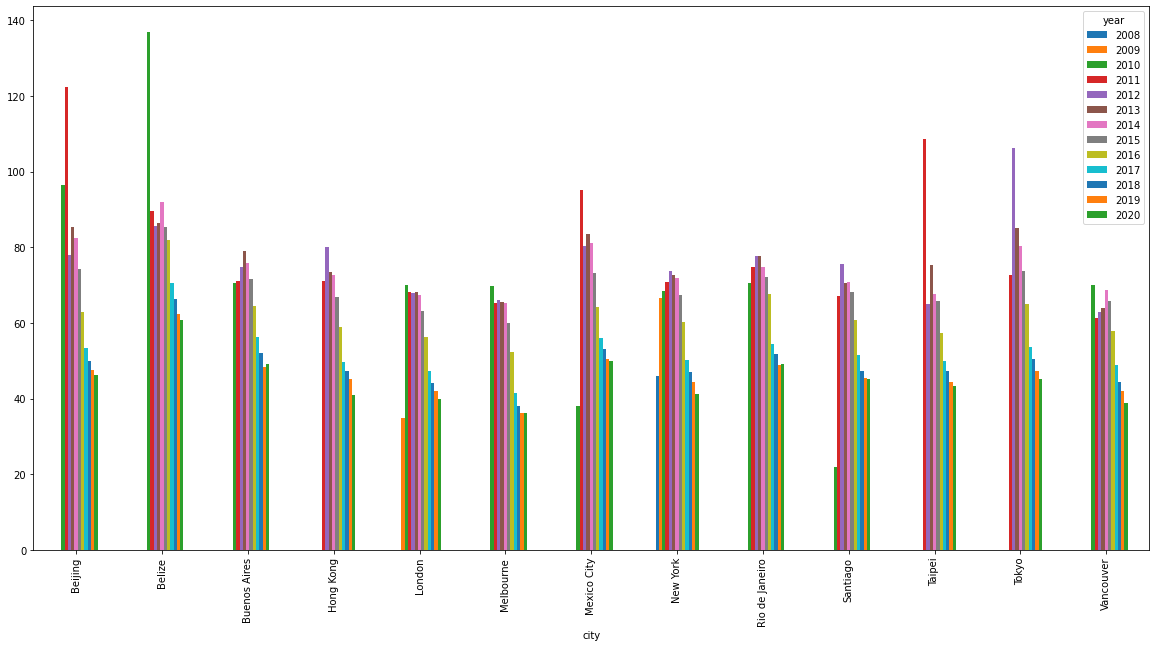

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax = data.groupby(['city', 'year'])['num_words'].mean().reset_index().pivot('city', 'year', 'num_words').plot(kind='bar', ax=ax);

In [30]:
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [36]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [17]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,review_scores_rating,probability,language,comments_cleaned,comments_cleaned_sentiment,num_words,year,type,comment_to_sentences,comment_to_sentences_regex
0,13913,2010-08-18,My girlfriend and I hadn't known Alina before ...,54730,2009-11-16,Islington,London,51.56802,-0.11121,21,...,97.0,0.999997,en,My girlfriend and I hadn t known Alina before ...,My girlfriend and I hadn t known Alina before ...,153,2010,western,[My girlfriend and I hadn t known Alina before...,[My girlfriend and I hadn t known Alina before...
1,13913,2011-07-11,Alina was a really good host. The flat is clea...,54730,2009-11-16,Islington,London,51.56802,-0.11121,21,...,97.0,0.999997,en,Alina was a really good host The flat is clean...,Alina was a really good host. The flat is clea...,31,2011,western,"[Alina was a really good host., The flat is cl...","[Alina was a really good host, The flat is cle..."
2,13913,2011-09-13,Alina is an amazing host. She made me feel rig...,54730,2009-11-16,Islington,London,51.56802,-0.11121,21,...,97.0,0.999995,en,Alina is an amazing host She made me feel righ...,Alina is an amazing host. She made me feel rig...,70,2011,western,"[Alina is an amazing host., She made me feel r...","[Alina is an amazing host, She made me feel ri..."
3,13913,2011-10-03,"Alina's place is so nice, the room is big and ...",54730,2009-11-16,Islington,London,51.56802,-0.11121,21,...,97.0,0.999997,en,Alina s place is so nice the room is big and c...,Alina s place is so nice the room is big and c...,87,2011,western,[Alina s place is so nice the room is big and ...,[Alina s place is so nice the room is big and ...
4,13913,2011-10-09,"Nice location in Islington area, good for shor...",54730,2009-11-16,Islington,London,51.56802,-0.11121,21,...,97.0,0.999998,en,Nice location in Islington area good for short...,Nice location in Islington area good for short...,17,2011,western,[Nice location in Islington area good for shor...,[Nice location in Islington area good for shor...


In [18]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [19]:
data = stratified_sample_df(data, 'city', 10000)
print(data.shape)
data.head()

(130000, 22)


,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,review_scores_rating,probability,language,comments_cleaned,comments_cleaned_sentiment,num_words,year,type,comment_to_sentences,comment_to_sentences_regex
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,97.0,0.999998,en,Cozy and charming historical house in the cent...,Cozy and charming historical house in the cent...,37,2016,non western,[Cozy and charming historical house in the cen...,[Cozy and charming historical house in the cen...
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,98.0,0.999995,en,This is a lovely shared apartment You have you...,This is a lovely shared apartment. You have yo...,34,2019,non western,"[This is a lovely shared apartment., You have ...","[This is a lovely shared apartment, You have y..."
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,94.0,0.999999,en,The house is wonderfully designed especially l...,The house is wonderfully designed especially l...,140,2016,non western,[The house is wonderfully designed especially ...,[The house is wonderfully designed especially ...
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,100.0,0.999997,en,Good room everything seemed clean enough space...,Good room everything seemed clean enough space...,49,2019,non western,[Good room everything seemed clean enough spac...,[Good room everything seemed clean enough spac...
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,99.0,0.999997,en,Lu was very welcoming and his command of Engli...,Lu was very welcoming and his command of Engli...,100,2018,non western,[Lu was very welcoming and his command of Engl...,[Lu was very welcoming and his command of Engl...


In [20]:
from nltk.tokenize import word_tokenize
data['sentences_to_tokens'] = data['comment_to_sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])

In [21]:
data['sentences_to_tokens_regex'] = data['comment_to_sentences_regex'].progress_map(lambda sentences: 
                                                                                    [word_tokenize(sentence) 
                                                                                     for sentence in sentences])

In [22]:
print(data['sentences_to_tokens'].tolist()[:3])

[[['Cozy', 'and', 'charming', 'historical', 'house', 'in', 'the', 'center', 'of', 'Beijing', '.'], ['Room', 'is', 'warm', 'and', 'clean', 'the', 'living', 'room', 'is', 'decorated', 'really', 'nice', '.'], ['It', 'is', 'quiet', 'at', 'night', 'suitable', 'for', 'those', 'who', 'are', 'not', 'easy', 'to', 'sleep', '.'], ['gps']], [['This', 'is', 'a', 'lovely', 'shared', 'apartment', '.'], ['You', 'have', 'your', 'individual', 'ensuite', '.'], ['However', 'the', 'kitchen', 'is', 'open', 'to', 'entire', 'hotel', '.'], ['Very', 'modern', 'and', 'clean', '.'], ['Great', 'location', 'only', 'three', 'minutes', 'walking', 'Distance', 'to', 'metro', 'or', 'Wangfujing', '.']], [['The', 'house', 'is', 'wonderfully', 'designed', 'especially', 'love', 'the', 'rooftop', 'where', 'me', 'and', 'my', 'friend', 'could', 'just', 'chill', 'under', 'the', 'sun', '.'], ['Chiyi', 's', 'parents', 'are', 'the', 'most', 'lovely', 'and', 'gave', 'us', 'a', 'real', 'taste', 'of', 'Beijing', 'neighbourhood', '.']

In [23]:
print(data['sentences_to_tokens_regex'].tolist()[:3])

[[['Cozy', 'and', 'charming', 'historical', 'house', 'in', 'the', 'center', 'of', 'Beijing'], ['Room', 'is', 'warm', 'and', 'clean', 'the', 'living', 'room', 'is', 'decorated', 'really', 'nice'], ['It', 'is', 'quiet', 'at', 'night', 'suitable', 'for', 'those', 'who', 'are', 'not', 'easy', 'to', 'sleep'], ['gps']], [['This', 'is', 'a', 'lovely', 'shared', 'apartment'], ['You', 'have', 'your', 'individual', 'ensuite'], ['However', 'the', 'kitchen', 'is', 'open', 'to', 'entire', 'hotel'], ['Very', 'modern', 'and', 'clean'], ['Great', 'location', 'only', 'three', 'minutes', 'walking', 'Distance', 'to', 'metro', 'or', 'Wangfujing'], []], [['The', 'house', 'is', 'wonderfully', 'designed', 'especially', 'love', 'the', 'rooftop', 'where', 'me', 'and', 'my', 'friend', 'could', 'just', 'chill', 'under', 'the', 'sun'], ['Chiyi', 's', 'parents', 'are', 'the', 'most', 'lovely', 'and', 'gave', 'us', 'a', 'real', 'taste', 'of', 'Beijing', 'neighbourhood'], ['Their', 'buns', 'for', 'breakfast', 'were'

In [116]:
content = data.sentences_to_tokens_regex.values.tolist()

In [117]:
print(content[:10])

[[['Cozy', 'and', 'charming', 'historical', 'house', 'in', 'the', 'center', 'of', 'Beijing'], ['Room', 'is', 'warm', 'and', 'clean', 'the', 'living', 'room', 'is', 'decorated', 'really', 'nice'], ['It', 'is', 'quiet', 'at', 'night', 'suitable', 'for', 'those', 'who', 'are', 'not', 'easy', 'to', 'sleep'], ['gps']], [['This', 'is', 'a', 'lovely', 'shared', 'apartment'], ['You', 'have', 'your', 'individual', 'ensuite'], ['However', 'the', 'kitchen', 'is', 'open', 'to', 'entire', 'hotel'], ['Very', 'modern', 'and', 'clean'], ['Great', 'location', 'only', 'three', 'minutes', 'walking', 'Distance', 'to', 'metro', 'or', 'Wangfujing'], []], [['The', 'house', 'is', 'wonderfully', 'designed', 'especially', 'love', 'the', 'rooftop', 'where', 'me', 'and', 'my', 'friend', 'could', 'just', 'chill', 'under', 'the', 'sun'], ['Chiyi', 's', 'parents', 'are', 'the', 'most', 'lovely', 'and', 'gave', 'us', 'a', 'real', 'taste', 'of', 'Beijing', 'neighbourhood'], ['Their', 'buns', 'for', 'breakfast', 'were'

In [118]:
content = [sentence for sentences in content for sentence in sentences]

In [119]:
print(content[:10])

[['Cozy', 'and', 'charming', 'historical', 'house', 'in', 'the', 'center', 'of', 'Beijing'], ['Room', 'is', 'warm', 'and', 'clean', 'the', 'living', 'room', 'is', 'decorated', 'really', 'nice'], ['It', 'is', 'quiet', 'at', 'night', 'suitable', 'for', 'those', 'who', 'are', 'not', 'easy', 'to', 'sleep'], ['gps'], ['This', 'is', 'a', 'lovely', 'shared', 'apartment'], ['You', 'have', 'your', 'individual', 'ensuite'], ['However', 'the', 'kitchen', 'is', 'open', 'to', 'entire', 'hotel'], ['Very', 'modern', 'and', 'clean'], ['Great', 'location', 'only', 'three', 'minutes', 'walking', 'Distance', 'to', 'metro', 'or', 'Wangfujing'], []]


In [120]:
with open('content.pkl', 'wb') as f:
    pickle.dump(content, f)

In [98]:
def sent_to_words(doc):
    for sentences in doc:
        for sentence in sentences:
            return (gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [5]:
with open('content.pkl', 'rb') as f:
    content = pickle.load(f)

In [26]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

def freq_words(content):
    all_words = [word for text in content for sentence in text for word in sentence]
    freq_dist = FreqDist(all_words)
    return freq_dist

In [27]:
%%time
words_freq = freq_words(data['sentences_to_tokens_regex'])

CPU times: user 6.01 s, sys: 51.2 ms, total: 6.06 s
Wall time: 6.07 s


In [21]:
with open('words_freq.pkl', 'wb') as f:
    pickle.dump(words_freq, f)

In [28]:
# function to plot most frequent terms
def plot_freq_words(fdist, terms = 20):
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns='count', n = terms) 
    plt.figure(figsize=(20,7))
    plt.tick_params(labelsize=12)
    ax = sns.barplot(data=d, x= 'word', y = 'count')
    ax.set_ylabel('Count', fontsize=14)
    ax.set_xlabel('Word', fontsize=14)
    plt.title('Most frequent words', fontdict=dict(size=20))
    plt.show()

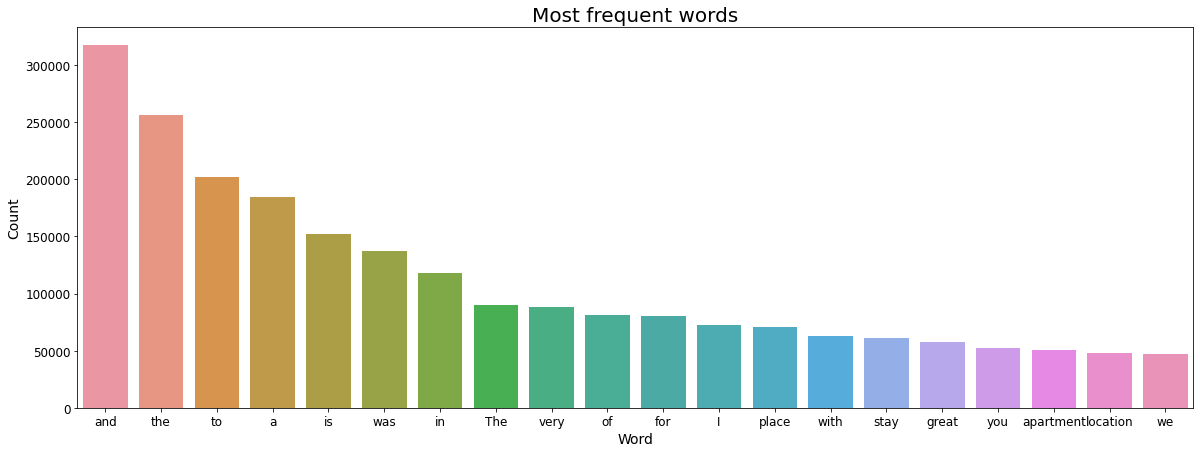

In [29]:
plot_freq_words(words_freq, 20)

In [61]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_.lower() for token in doc 
                          if token.is_stop != True 
                          and token.is_alpha == True
                          and token.is_punct != True 
                          and token.pos_ in allowed_postags
                         and len(token)>1])
    return texts_out

In [64]:
%%time
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser'])

# Do lemmatization keeping only noun, adj, vb, adv
data['tokens_lemmatized'] = data['sentences_to_tokens_regex'].map(lambda sentences: lemmatization(sentences, 
                                                                            allowed_postags=['NOUN', 'VERB', 'ADJ', 'ADV']))


CPU times: user 1h 9min 26s, sys: 4.25 s, total: 1h 9min 31s
Wall time: 1h 9min 37s


In [72]:
data['tokens_lemmatized'].tolist()[:5]

[[['cozy', 'charm', 'historical', 'house', 'center'],
  ['room', 'warm', 'clean', 'living', 'room', 'decorate', 'nice'],
  ['quiet', 'night', 'suitable', 'easy', 'sleep'],
  []],
 [['lovely', 'share', 'apartment'],
  ['individual', 'ensuite'],
  ['kitchen', 'open', 'entire', 'hotel'],
  ['modern', 'clean'],
  ['great', 'location', 'minute', 'walk'],
  []],
 [['house',
   'wonderfully',
   'design',
   'especially',
   'love',
   'rooftop',
   'friend',
   'chill',
   'sun'],
  ['parent', 'lovely', 'give', 'real', 'taste', 'neighbourhood'],
  ['bun', 'breakfast', 'great'],
  ['free', 'use', 'kitchen', 'amenity', 'dumpling', 'oatmeal', 'fruit'],
  ['ready', 'breakfast', 'thoughtful'],
  ['small', 'hassle', 'check', 'immediately', 'go', 'way', 'hour', 'journey'],
  ['feel', 'sorry', 'appreciate', 'effort'],
  ['effective', 'arrangement', 'prevent'],
  [],
  ['locker', 'password', 'store', 'key', 'emergency'],
  ['highly',
   'recommend',
   'place',
   'great',
   'hospitality',
   'locat

In [74]:
data_lemmatized = data['tokens_lemmatized'].tolist()

In [75]:
data_words =  [sentence for sentences in data_lemmatized for sentence in sentences]

In [76]:
data_words

[['cozy', 'charm', 'historical', 'house', 'center'],
 ['room', 'warm', 'clean', 'living', 'room', 'decorate', 'nice'],
 ['quiet', 'night', 'suitable', 'easy', 'sleep'],
 [],
 ['lovely', 'share', 'apartment'],
 ['individual', 'ensuite'],
 ['kitchen', 'open', 'entire', 'hotel'],
 ['modern', 'clean'],
 ['great', 'location', 'minute', 'walk'],
 [],
 ['house',
  'wonderfully',
  'design',
  'especially',
  'love',
  'rooftop',
  'friend',
  'chill',
  'sun'],
 ['parent', 'lovely', 'give', 'real', 'taste', 'neighbourhood'],
 ['bun', 'breakfast', 'great'],
 ['free', 'use', 'kitchen', 'amenity', 'dumpling', 'oatmeal', 'fruit'],
 ['ready', 'breakfast', 'thoughtful'],
 ['small', 'hassle', 'check', 'immediately', 'go', 'way', 'hour', 'journey'],
 ['feel', 'sorry', 'appreciate', 'effort'],
 ['effective', 'arrangement', 'prevent'],
 [],
 ['locker', 'password', 'store', 'key', 'emergency'],
 ['highly',
  'recommend',
  'place',
  'great',
  'hospitality',
  'location',
  'heart',
  'tourist',
  'att

In [77]:
print(data['sentences_to_tokens_regex'].to_list()[:3])

[[['Cozy', 'and', 'charming', 'historical', 'house', 'in', 'the', 'center', 'of', 'Beijing'], ['Room', 'is', 'warm', 'and', 'clean', 'the', 'living', 'room', 'is', 'decorated', 'really', 'nice'], ['It', 'is', 'quiet', 'at', 'night', 'suitable', 'for', 'those', 'who', 'are', 'not', 'easy', 'to', 'sleep'], ['gps']], [['This', 'is', 'a', 'lovely', 'shared', 'apartment'], ['You', 'have', 'your', 'individual', 'ensuite'], ['However', 'the', 'kitchen', 'is', 'open', 'to', 'entire', 'hotel'], ['Very', 'modern', 'and', 'clean'], ['Great', 'location', 'only', 'three', 'minutes', 'walking', 'Distance', 'to', 'metro', 'or', 'Wangfujing'], []], [['The', 'house', 'is', 'wonderfully', 'designed', 'especially', 'love', 'the', 'rooftop', 'where', 'me', 'and', 'my', 'friend', 'could', 'just', 'chill', 'under', 'the', 'sun'], ['Chiyi', 's', 'parents', 'are', 'the', 'most', 'lovely', 'and', 'gave', 'us', 'a', 'real', 'taste', 'of', 'Beijing', 'neighbourhood'], ['Their', 'buns', 'for', 'breakfast', 'were'

In [78]:
print(data['tokens_lemmatized'].tolist()[:3])

[[['cozy', 'charm', 'historical', 'house', 'center'], ['room', 'warm', 'clean', 'living', 'room', 'decorate', 'nice'], ['quiet', 'night', 'suitable', 'easy', 'sleep'], []], [['lovely', 'share', 'apartment'], ['individual', 'ensuite'], ['kitchen', 'open', 'entire', 'hotel'], ['modern', 'clean'], ['great', 'location', 'minute', 'walk'], []], [['house', 'wonderfully', 'design', 'especially', 'love', 'rooftop', 'friend', 'chill', 'sun'], ['parent', 'lovely', 'give', 'real', 'taste', 'neighbourhood'], ['bun', 'breakfast', 'great'], ['free', 'use', 'kitchen', 'amenity', 'dumpling', 'oatmeal', 'fruit'], ['ready', 'breakfast', 'thoughtful'], ['small', 'hassle', 'check', 'immediately', 'go', 'way', 'hour', 'journey'], ['feel', 'sorry', 'appreciate', 'effort'], ['effective', 'arrangement', 'prevent'], [], ['locker', 'password', 'store', 'key', 'emergency'], ['highly', 'recommend', 'place', 'great', 'hospitality', 'location', 'heart', 'tourist', 'attraction'], []]]


In [137]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,comments_cleaned_sentiment,num_words,year,type,comment_to_sentences,comment_to_sentences_regex,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,Cozy and charming historical house in the cent...,37,2016,non western,[Cozy and charming historical house in the cen...,[Cozy and charming historical house in the cen...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro..."
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,This is a lovely shared apartment. You have yo...,34,2019,non western,"[This is a lovely shared apartment., You have ...","[This is a lovely shared apartment, You have y...","[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu..."
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,The house is wonderfully designed especially l...,140,2016,non western,[The house is wonderfully designed especially ...,[The house is wonderfully designed especially ...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love..."
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,Good room everything seemed clean enough space...,49,2019,non western,[Good room everything seemed clean enough spac...,[Good room everything seemed clean enough spac...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid..."
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,Lu was very welcoming and his command of Engli...,100,2018,non western,[Lu was very welcoming and his command of Engl...,[Lu was very welcoming and his command of Engl...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig..."


In [138]:
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [39]:
#stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
#stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
#my_stopwords = stopwords.words('English')

In [79]:
%%time
#Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], min_count=5)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(bigram_mod[data_words[0]])
print(trigram_mod[data_words[0]])

['cozy', 'charm', 'historical', 'house', 'center']
['cozy', 'charm', 'historical', 'house', 'center']
CPU times: user 51.2 s, sys: 493 ms, total: 51.7 s
Wall time: 51.8 s


In [80]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [81]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [82]:
%%time
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)
data_words_trigrams = make_trigrams(make_bigrams(data_words))
print(data_words_trigrams[:10])

[['cozy', 'charm', 'historical', 'house', 'center'], ['room', 'warm', 'clean', 'living_room', 'decorate', 'nice'], ['quiet', 'night', 'suitable', 'easy', 'sleep'], [], ['lovely', 'share', 'apartment'], ['individual', 'ensuite'], ['kitchen', 'open', 'entire', 'hotel'], ['modern', 'clean'], ['great', 'location', 'minute_walk'], []]
CPU times: user 52.5 s, sys: 757 ms, total: 53.3 s
Wall time: 53.4 s


In [83]:
with open('token.pkl', 'wb') as f:
    pickle.dump(data_words_trigrams, f)

In [84]:
words_freq = dict()
for doc in data_words_trigrams:
    for word in doc:
        if word in words_freq:
            words_freq[word] = words_freq[word] + 1
        else:
            words_freq[word] = 1

In [85]:
import operator
dict(sorted(words_freq.items(), key=operator.itemgetter(1),reverse=True))

{'stay': 79738,
 'place': 77959,
 'great': 76820,
 'apartment': 52538,
 'location': 52252,
 'host': 43259,
 'clean': 40529,
 'good': 37038,
 'nice': 34253,
 'room': 25379,
 'need': 23446,
 'close': 22554,
 'comfortable': 21471,
 'time': 20375,
 'perfect': 19198,
 'recommend': 18096,
 'helpful': 17830,
 'definitely': 16511,
 'easy': 14818,
 'restaurant': 14358,
 'area': 14029,
 'thank': 14028,
 'house': 13873,
 'amazing': 13569,
 'check': 13306,
 'highly_recommend': 12060,
 'friendly': 12060,
 'super': 12054,
 'lot': 11899,
 'day': 11502,
 'lovely': 11276,
 'love': 11229,
 'space': 10858,
 'quiet': 10810,
 'enjoy': 10727,
 'beautiful': 10528,
 'home': 10429,
 'night': 10426,
 'wonderful': 10384,
 'come': 10203,
 'convenient': 10019,
 'experience': 9709,
 'walk': 9624,
 'bed': 9509,
 'city': 9055,
 'small': 9024,
 'excellent': 8912,
 'locate': 8782,
 'neighborhood': 8655,
 'help': 8515,
 'provide': 8160,
 'view': 8157,
 'station': 7978,
 'little': 7949,
 'spacious': 7764,
 'visit': 7733,

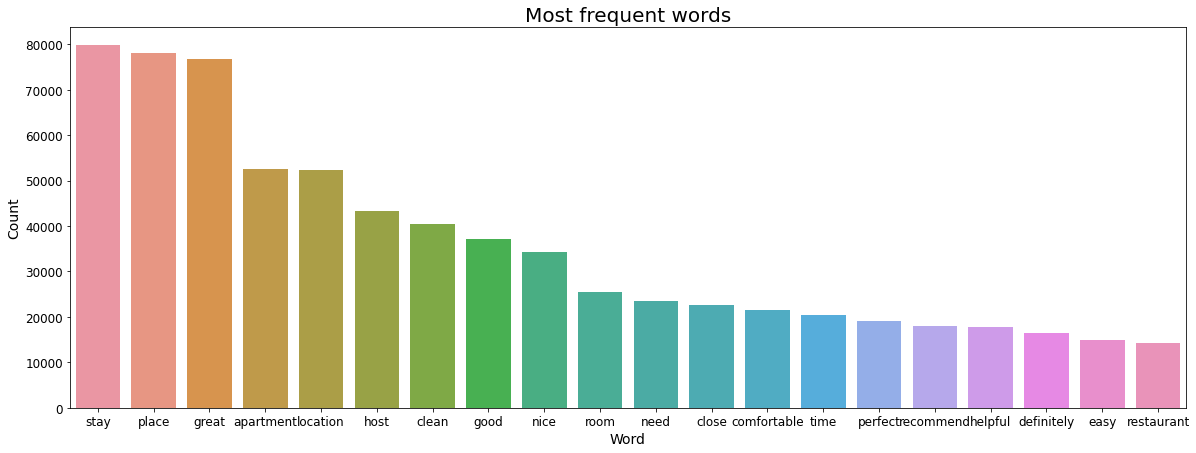

In [86]:
plot_freq_words(words_freq, 20)

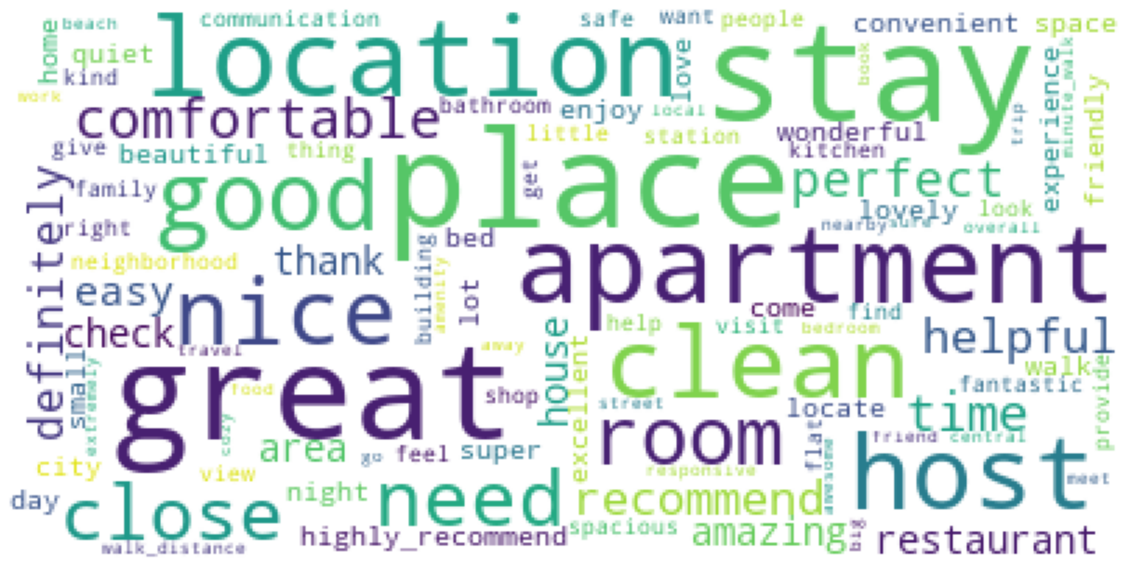

In [87]:
#Word cloud
from wordcloud import WordCloud, ImageColorGenerator

#words = ''
#for doc in data_lemmatized:
    #words = words + ' ' + ' '.join([text for text in doc])
    
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      max_font_size=50,
                      random_state=42).generate_from_frequencies(words_freq)
#print(wordcloud)
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [90]:
allWordDist = FreqDist(sentence for sentences in data_words_trigrams for sentence in sentences)

In [92]:
allWordDist

FreqDist({'stay': 79738, 'place': 77959, 'great': 76820, 'apartment': 52538, 'location': 52252, 'host': 43259, 'clean': 40529, 'good': 37038, 'nice': 34253, 'room': 25379, ...})

In [93]:
mostCommon= allWordDist.most_common(10)
mostCommon

[('stay', 79738),
 ('place', 77959),
 ('great', 76820),
 ('apartment', 52538),
 ('location', 52252),
 ('host', 43259),
 ('clean', 40529),
 ('good', 37038),
 ('nice', 34253),
 ('room', 25379)]